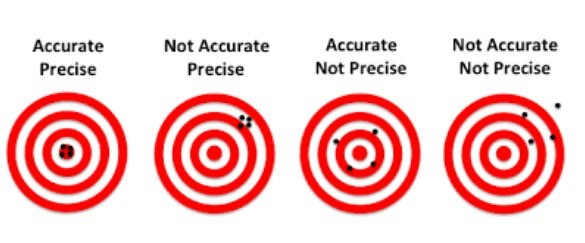

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

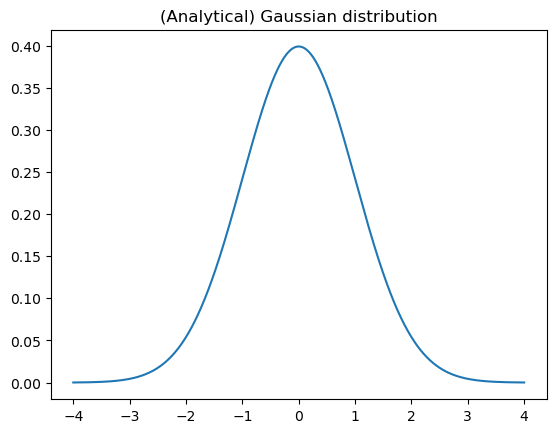

In [3]:
# Gaussian
N = 1001
x = np.linspace(-4,4,N)
gauss = stats.norm.pdf(x) # pdf = Probability Density Function
plt.plot(x, gauss)
plt.title('(Analytical) Gaussian distribution')
plt.show()

# Is this a probability distribution? -> No, because it would need to sum up to 1.

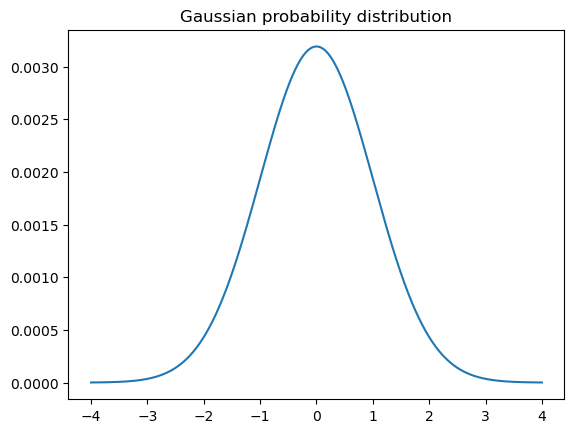

sum=0.9999999999999996


In [4]:
plt.plot(x, gauss/sum(gauss))
plt.title('Gaussian probability distribution')
plt.show()
print(f'sum={sum(gauss/sum(gauss))}')

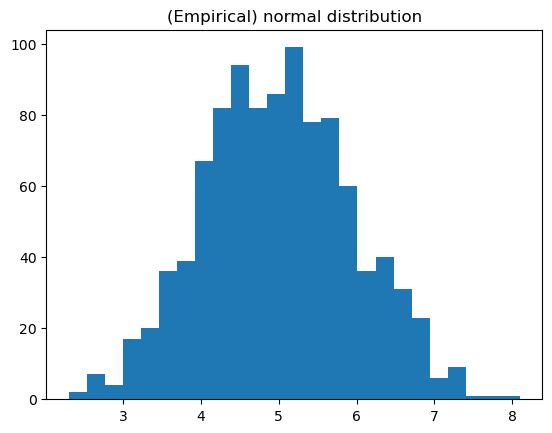

'mean=5.001281965327135'

In [5]:
# Normally distributed random numbers
stretch = 1
shift   = 5
n       = 1000
x = stretch * np.random.randn(n) + shift
plt.hist(x,25)
plt.title('(Empirical) normal distribution')
plt.show()
f'mean={np.mean(x)}'

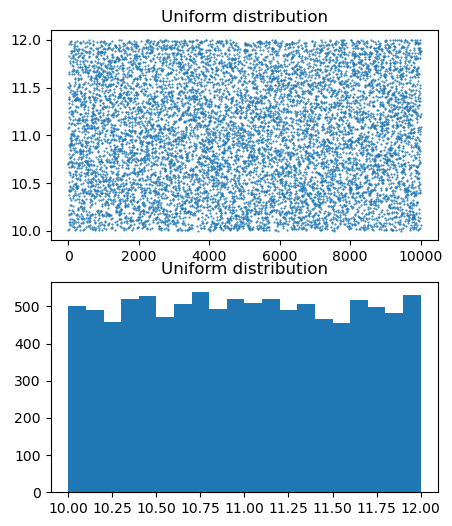

'mean=11.000277419708677'

In [6]:
# Uniformly distributed random numbers
stretch = 2
shift   = 10
n       = 10_000
x = stretch * np.random.rand(n) + shift

fig,ax = plt.subplots(2,1,figsize=(5,6))

ax[0].plot(x,'.',markersize=1)
ax[0].set_title('Uniform distribution')

ax[1].hist(x,20)
ax[1].set_title('Uniform distribution')

plt.show()
f'mean={np.mean(x)}'

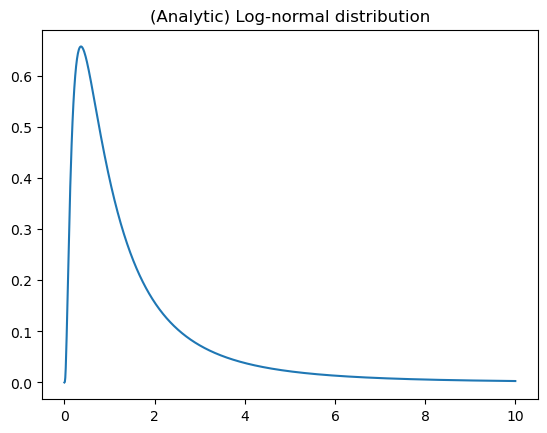

In [7]:
# Log-normal distribution
N = 1001
x = np.linspace(0,10,N)
lognorm = stats.lognorm.pdf(x,1)

plt.plot(x,lognorm)
plt.title('(Analytic) Log-normal distribution')
plt.show()

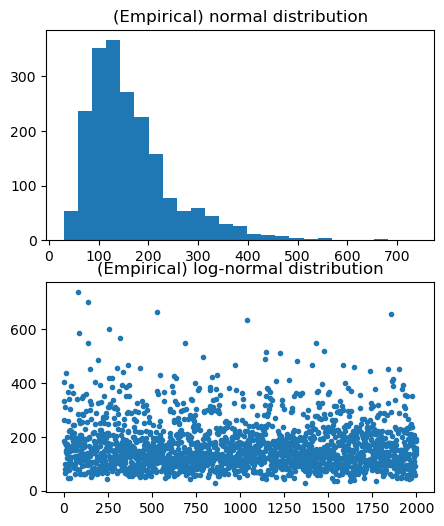

In [8]:
# Empirical log-normal distribution
stretch = .5
shift   = 5
n       = 2000

fig,ax = plt.subplots(2,1,figsize=(5,6))

x = np.exp(stretch * np.random.randn(n) + shift)
ax[0].hist(x,25)
ax[0].set_title('(Empirical) normal distribution')
ax[1].plot(x,'.')
ax[1].set_title('(Empirical) log-normal distribution')
plt.show()

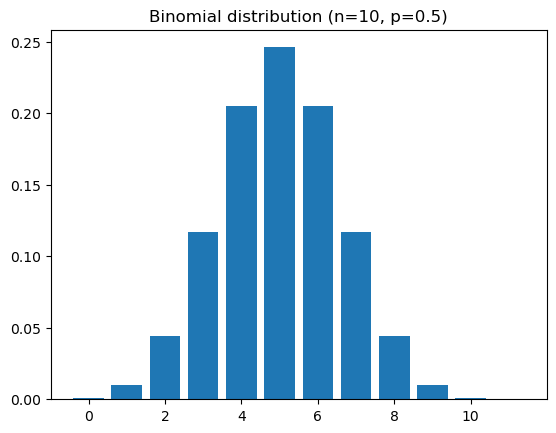

sum=0.9999999999999999


In [9]:
# Binomial distribution
# The probability of getting k heads out of n coin tosses
p = .5 # The probability of one head
n = 10
x = range(n+2)
bindist = stats.binom.pmf(x,n,p)

plt.bar(x,bindist)
plt.title('Binomial distribution (n=%s, p=%s)'%(n,p))
plt.show()
print(f'sum={sum(bindist)}')

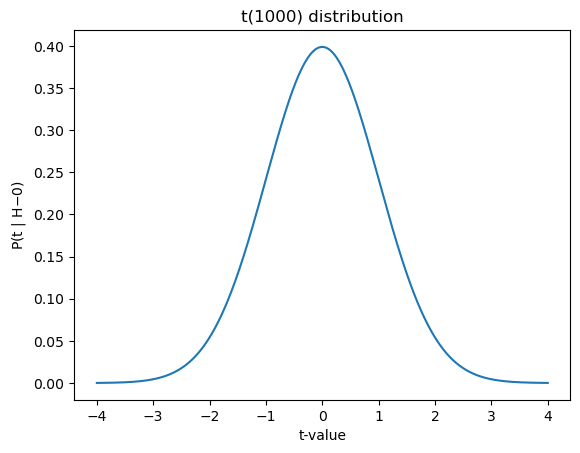

In [10]:
# t distribution

x = np.linspace(-4,4,1001)
df = 1000 # Degrees of freedom
t = stats.t.pdf(x,df)

plt.plot(x,t)
plt.xlabel('t-value')
plt.ylabel('P(t | H$-0$)')
plt.title('t(%g) distribution'%(df))
plt.show()

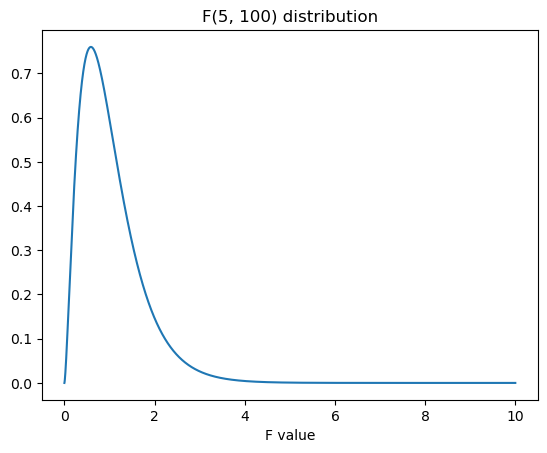

In [11]:
# f distribution

numerator_df = 5
denominator_df = 100

x = np.linspace(0,10,10001)
f = stats.f.pdf(x,numerator_df,denominator_df)

plt.plot(x,f)
plt.title(f'F({numerator_df}, {denominator_df}) distribution')
plt.xlabel('F value')
plt.show()

<h1 style="text-align:center;">Measures of central tendency</h1>
<ol>
    <li>Mean (average)</li>
    <li>Median</li>
    <li>Mode</li>
</ol>

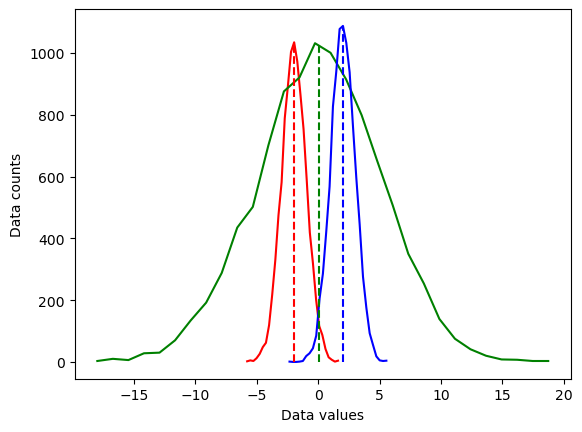

In [12]:
N = 10_001
nbins = 30
d1 = np.random.randn(N) - 2
d2 = np.random.randn(N) * 5
d3 = np.random.randn(N) + 2

y1,x1 = np.histogram(d1,nbins)
x1 = (x1[1:] + x1[:-1]) / 2

y2,x2 = np.histogram(d2,nbins)
x2 = (x2[1:] + x2[:-1]) / 2

y3,x3 = np.histogram(d3,nbins)
x3 = (x3[1:] + x3[:-1]) / 2

plt.plot(x1,y1,'r')
plt.plot(x2,y2,'g')
plt.plot(x3,y3,'b')

mean_d1 = np.mean(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

plt.plot([mean_d1,mean_d1],[0, max(y1)],'r--')
plt.plot([mean_d2,mean_d2],[0, max(y2)],'g--')
plt.plot([mean_d3,mean_d3],[0, max(y3)],'b--')

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

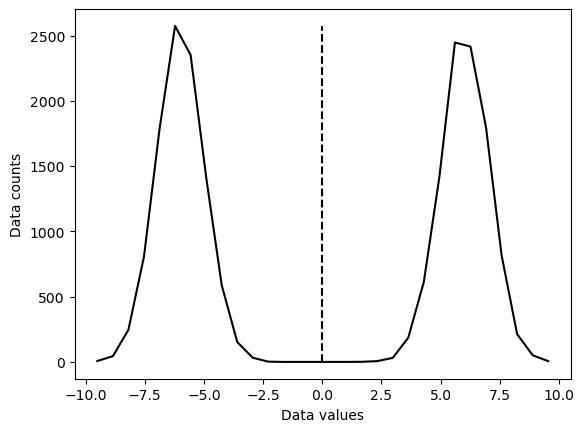

0.007092103940241605


In [13]:
# Failure of mean
N = 10_001
nbins = 30
d = np.hstack((np.random.randn(N) - 6,np.random.randn(N) + 6))

y,x = np.histogram(d,nbins)
x = (x[1:] + x[:-1]) / 2

plt.plot(x,y,'k')

mean_d = np.mean(d)

plt.plot([mean_d,mean_d],[0, max(y)],'k--')
plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()
print(mean_d)

<h1 style="text-align:center;">Measures of dispersion</h1>
<ol>
    <li>Variance (Sigma squared)</li>
    <li>Standard deviation (Sigma)</li>
</ol>

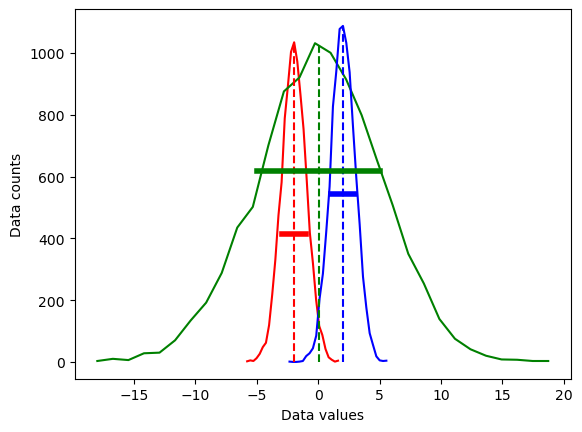

In [14]:
stds = np.zeros(3)

stds[0] = np.std(d1,ddof=1) # ddof defaults to 0, which results in population, or "biased" deviation
stds[1] = np.std(d2,ddof=1) # ddof=1 is sample deviation
stds[2] = np.std(d3,ddof=1)

plt.plot(x1,y1,'r')
plt.plot(x2,y2,'g')
plt.plot(x3,y3,'b')

mean_d1 = np.mean(d1)
mean_d2 = np.mean(d2)
mean_d3 = np.mean(d3)

plt.plot([mean_d1,mean_d1],[0, max(y1)],'r--')
plt.plot([mean_d2,mean_d2],[0, max(y2)],'g--')
plt.plot([mean_d3,mean_d3],[0, max(y3)],'b--')

plt.plot([mean_d1-stds[0],mean_d1+stds[0]],[.4*max(y1),.4*max(y1)],'r',linewidth=4)
plt.plot([mean_d2-stds[1],mean_d2+stds[1]],[.6*max(y2),.6*max(y2)],'g',linewidth=4)
plt.plot([mean_d3-stds[2],mean_d3+stds[2]],[.5*max(y3),.5*max(y3)],'b',linewidth=4)

plt.xlabel('Data values')
plt.ylabel('Data counts')
plt.show()

<h1 style="text-align:center;">IQR (Inter quartile range)</h1>

<p>First quartile is "left median", second is median, third is "right median"</p>
<p>IQR is the distance between third and first quartile</p>

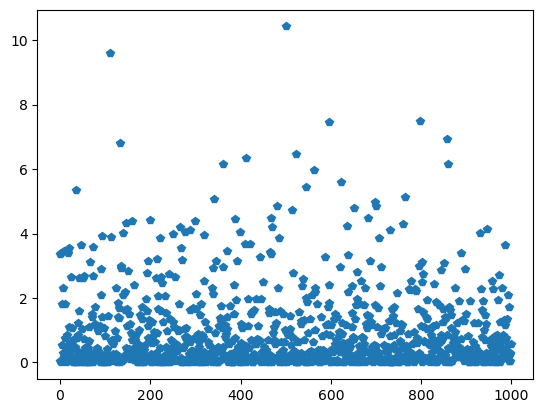

In [23]:
n = 1000
data = np.random.randn(n)**2
plt.plot(data, 'p')
plt.show()

In [42]:
dataR = stats.rankdata(data)/n # gives back which element is at what order if we sorted the data array

q1 = np.argmin((dataR-.25)**2) # index of quartile 1
q3 = np.argmin((dataR-.75)**2) # index of quartile 3
# argmin gives index of minimum

iqVals = data[[q1,q3]] # quartile values
iqRange = iqVals[1] - iqVals[0]
iqRange_ = stats.iqr(data)

print(f'iqRange ={iqRange}')
print(f'iqRange_={iqRange_}')

iqRange =1.1163413065602963
iqRange_=1.1177407745677046
